<a href="https://colab.research.google.com/github/thatcathatechat/digital-image-processing-course/blob/main/DIP_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Objective:
To understand the concept of aliasing and false contouring.

1. Convert the given Lena image to grayscale image. Use the cv2.resize() to down sample the image with 4 sizes  (128x128, 64x64, 32x32, and 16x16).  Display  the original image, and down sampled images with the same display size. Observe what happens

2. Down sample the grayscale Lena image with  8 different intensity ranges of values (0-255, 0-127, 0-63, 0-31, 0-15, 0-7, 0-3, and 0-1). (Note: Size of images are the same). And display all those 8 downsampled images  in the same size display area on the screen. Observe what happens   

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 
from google.colab.patches import cv2_imshow
# download lena image
!wget https://raw.githubusercontent.com/thatcathatechat/digital-image-processing-course/main/media/Lena.png 

--2022-02-01 14:09:35--  https://raw.githubusercontent.com/thatcathatechat/digital-image-processing-course/main/media/Lena.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lena.png’

Lena.png            100%[===================>] 462.73K  --.-KB/s    in 0.04s   

2022-02-01 14:09:35 (12.5 MB/s) - ‘Lena.png’ saved [473831/473831]



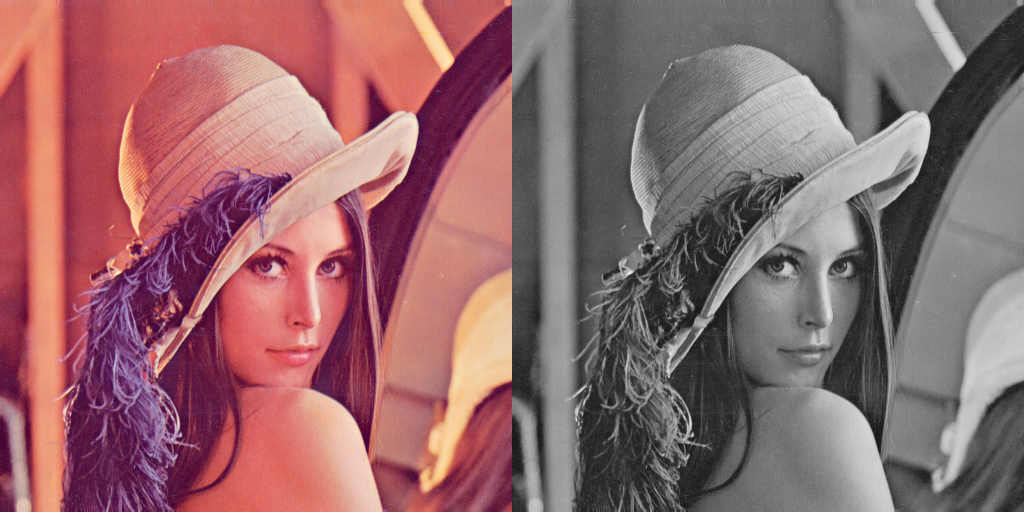

In [2]:
image = cv2.imread('Lena.png')
grey = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
grey_3 = cv2.cvtColor(grey,cv2.COLOR_GRAY2RGB)
image_grey = np.concatenate((image,grey_3),axis=1)
cv2_imshow(image_grey)

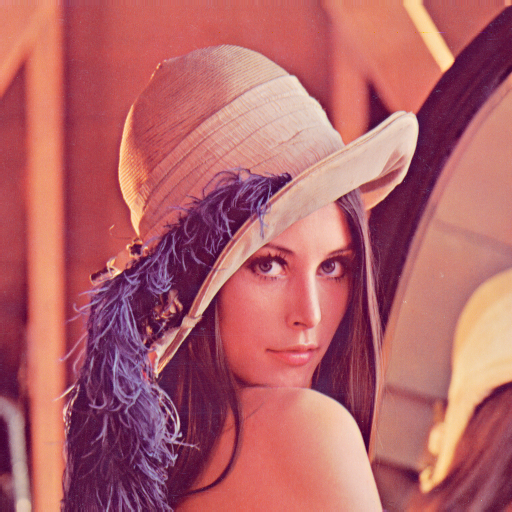

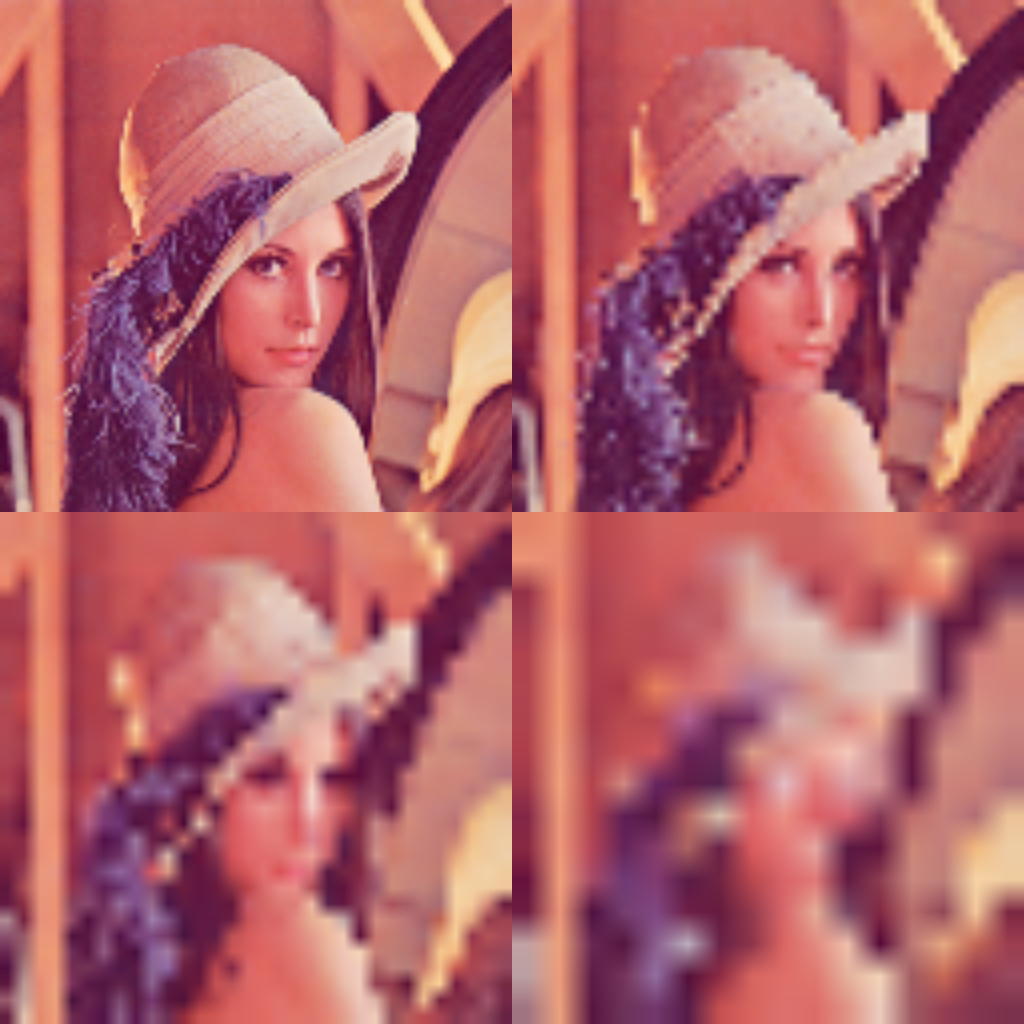

In [3]:
var = image
img1 = cv2.resize(var,(128,128))
img1_r =  cv2.resize(img1,(512,512))
img2 = cv2.resize(var,(64,64))
img2_r =  cv2.resize(img2,(512,512))
img3 = cv2.resize(var,(32,32))
img3_r =  cv2.resize(img3,(512,512))
img4 = cv2.resize(var,(16,16))
img4_r =  cv2.resize(img4,(512,512))

cv2_imshow(var)

hori1 = np.concatenate((img1_r,img2_r),axis=1)
hori2 = np.concatenate((img3_r,img4_r),axis=1)
ver = np.concatenate((hori1,hori2),axis=0)
cv2_imshow(ver)

In [4]:
def changeIntensity(f_image,value):
  minFval = np.min(f_image)
  h_image = f_image - minFval
  maxHval = np.max(h_image)
  h_image = h_image / maxHval
  h_image = h_image * value
  h_image = np.round(h_image)
  h_image = h_image.astype(int)
  return h_image

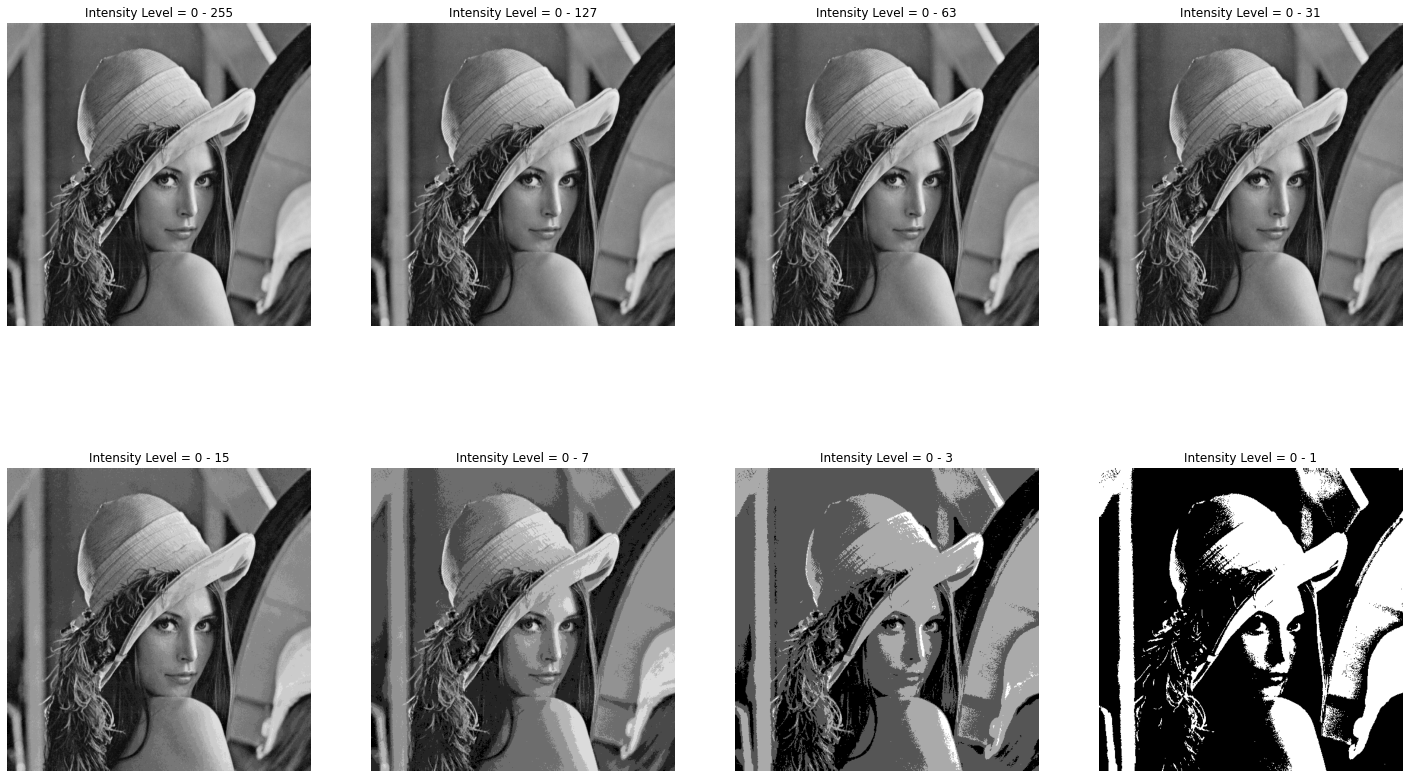

In [5]:
grey_255 = changeIntensity(grey,255)
grey_127 = changeIntensity(grey,127)
grey_63 = changeIntensity(grey,63)
grey_31 = changeIntensity(grey,31)
grey_15 = changeIntensity(grey,15)
grey_7 = changeIntensity(grey,7)
grey_3 = changeIntensity(grey,3)
grey_1 = changeIntensity(grey,1)

imgs = [grey_255,grey_127,grey_63,grey_31,grey_15,grey_7,grey_3,grey_1]

fig = plt.figure(figsize=(25, 15))
row = 2
col = 4
j = 1

for i in range(0,8,1):
  fig.add_subplot(row,col,j)
  plt.imshow(imgs[i],cmap='gray')
  plt.title("Intensity Level = 0 - " + str(2**(8-i)-1))
  plt.axis('off')
  j += 1